<a href="https://colab.research.google.com/github/faytroy/CSC_Week6/blob/main/Copy_of_HW5_AODC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Q3
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [3]:
#You have to make sure that you were able to write the file to a csv while your were working in R
house=pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [9]:
states = ['Michigan', 'California', 'Texas', 'Indiana']
#your code goes here
house['date'] = pd.to_datetime(house['date'])
selected_states = ['michigan', 'california', 'texas', 'indiana']
filtered_data = house[house['state'].str.lower().isin(selected_states)]
print(filtered_data.head())

      Unnamed: 0       date       state  unemploy_perc  house_price_index  \
2016        2017 1976-01-01  California            9.1          17.908764   
2017        2018 1976-02-01  California            9.1          18.117587   
2018        2019 1976-03-01  California            9.0          18.379530   
2019        2020 1976-04-01  California            9.0          18.673067   
2020        2021 1976-05-01  California            8.9          18.899995   

      house_price_perc  
2016          0.139067  
2017          0.148485  
2018          0.151243  
2019          0.147308  
2020          0.143167  


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

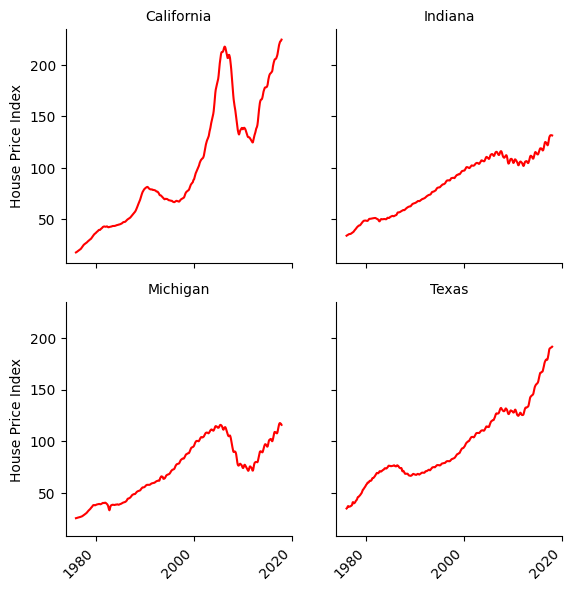

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

years = pd.to_datetime(['1980', '2000', '2020'])
g = sns.FacetGrid(filtered_data, col="state", col_wrap=2, height=3, aspect=1)
g.map(sns.lineplot, "date", "house_price_index", color="red")
g.set_axis_labels("", "House Price Index")
for ax in g.axes.flat:
    ax.set_xticks(years)
    ax.set_xticklabels(['1980', '2000', '2020'])
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
        g.set_titles("{col_name}")
plt.show()



c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

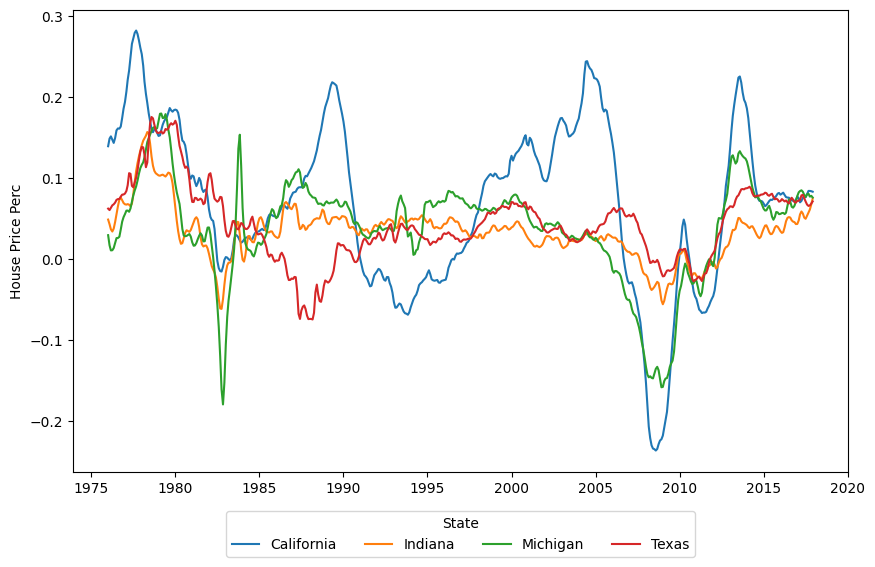

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x="date", y="house_price_perc", hue="state")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title='State', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xlabel("")
plt.ylabel("House Price Perc")
plt.show()